# Introduction

LOREM IPSUM

In [25]:
# loading libraries
library(tidyverse)
library(caret)
library(lubridate)
library(randomForest)
library(caTools)

In [26]:
# loading data
df <- read_csv('electric_bike_ratings_2212.csv')

Rows: 1500 Columns: 8
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (6): make_model, review_month, web_browser, reviewer_age, primary_use, v...
dbl (2): owned, overall_rating



i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


# First view of the data 

In [27]:
# loading data
df%>%head()

owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,Nielah-Eyden,Oct,Chrome,23,Commuting,5/10,18.62
0,Nielah-Keetra,Jun,NA,24,Commuting,4/10,15.55
0,Lunna-Keetra,23-Oct,Chrome,28,Commuting,5/10,12.76
1,Hoang-Keetra,07-Nov,IE,41,Leisure,5/10,17.07
1,Lunna-Keetra,16-Sep,Chrome,33,Leisure,5/10,12.29
0,Lunna-Eyden,26-Aug,IE,47,Commuting,5/10,15.28


In [28]:
df%>%tail()

owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,Nielah-Eyden,May,Safari,26,Leisure,5/10,19.07
1,Nielah-Eyden,18-May,Chrome,-,Leisure,6/10,18.76
1,Nielah-Eyden,11-Mar,NA,39,Commuting,5/10,18.56
1,Nielah-Eyden,10-Nov,Chrome,21,Commuting,8/10,20.22
0,Nielah-Eyden,Nov,Safari,45,Commuting,3/10,18.51
1,Hoang-Eyden,Jul,IE,37,Leisure,3/10,20.47


In [29]:
# shape of data
dim(df)

[1] 1500    8

In [30]:
str(df)

spc_tbl_ [1,500 x 8] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ owned          : num [1:1500] 1 0 0 1 1 0 0 1 1 1 ...
 $ make_model     : chr [1:1500] "Nielah-Eyden" "Nielah-Keetra" "Lunna-Keetra" "Hoang-Keetra" ...
 $ review_month   : chr [1:1500] "Oct" "Jun" "23-Oct" "07-Nov" ...
 $ web_browser    : chr [1:1500] "Chrome" NA "Chrome" "IE" ...
 $ reviewer_age   : chr [1:1500] "23" "24" "28" "41" ...
 $ primary_use    : chr [1:1500] "Commuting" "Commuting" "Commuting" "Leisure" ...
 $ value_for_money: chr [1:1500] "5/10" "4/10" "5/10" "5/10" ...
 $ overall_rating : num [1:1500] 18.6 15.6 12.8 17.1 12.3 ...
 - attr(*, "spec")=
  .. cols(
  ..   owned = col_double(),
  ..   make_model = col_character(),
  ..   review_month = col_character(),
  ..   web_browser = col_character(),
  ..   reviewer_age = col_character(),
  ..   primary_use = col_character(),
  ..   value_for_money = col_character(),
  ..   overall_rating = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


In [31]:
# descriptive statistics
summary(df)

     owned         make_model        review_month       web_browser       
 Min.   :0.0000   Length:1500        Length:1500        Length:1500       
 1st Qu.:0.0000   Class :character   Class :character   Class :character  
 Median :1.0000   Mode  :character   Mode  :character   Mode  :character  
 Mean   :0.5933                                                           
 3rd Qu.:1.0000                                                           
 Max.   :1.0000                                                           
 reviewer_age       primary_use        value_for_money    overall_rating 
 Length:1500        Length:1500        Length:1500        Min.   :11.69  
 Class :character   Class :character   Class :character   1st Qu.:15.32  
 Mode  :character   Mode  :character   Mode  :character   Median :18.24  
                                                          Mean   :17.14  
                                                          3rd Qu.:18.84  
                               

## Summary of the first view
* **owned** -> not appropriate type for this variable
* **make_model** -> not appropriate type for this variable
* **review_month** -> not appropriate type for this variable
* **web_browser** -> not appropriate type for this variable
* **reviewer_age** -> not appropriate type for this variable
* **primary_use** -> not appropriate type for this variable
* **value_for_money** -> it might be better idea to remove "10" and "/" and changing to integer
* **overall_rating** -> this is appropriate for this variable 

## Data wrangling

In [32]:
# converts columns into appropriate types

df$owned <- factor(df$owned)

df$make_model <- factor(df$make_model)

df$web_browser <- factor(df$web_browser)

df$primary_use <- factor(df$primary_use)

df$value_for_money <- factor(df$value_for_money)

df$overall_rating <- as.numeric(df$overall_rating)


# Using regular expression with gsub() to remove number and special sign for "review_month"
df$review_month <- gsub("[0-9-]", "", df$review_month)
df$review_month <- factor(ifelse(is.na(df$review_month), "unknown", df$review_month))
levels(df$review_month)

# Using regular expression with str_extract to remove "10" and special sign for "value_for_money"

df$value_for_money <-  as.integer(str_extract(df$value_for_money, "[0-9]+"))

# repalce "-" with NA's in "reviewer_age" column
df$reviewer_age <- gsub("-", NA, df$reviewer_age) 
df$reviewer_age <- as.integer(df$reviewer_age)

[1] "Apr" "Aug" "Dec" "Feb" "Jan" "Jul" "Jun" "Mar" "May" "Nov" "Oct" "Sep"

In [33]:
# is it enough?
summary(df)

 owned           make_model   review_month  web_browser   reviewer_age 
 0:610   Hoang-Eyden  :124   Mar    :141   Android: 23   Min.   :16.0  
 1:890   Hoang-Keetra :124   Sep    :141   Chrome :698   1st Qu.:23.0  
         Lunna-Eyden  :329   May    :138   Firefox:233   Median :33.0  
         Lunna-Keetra :178   Jan    :126   IE     :239   Mean   :32.6  
         Nielah-Eyden :652   Nov    :126   Opera  : 24   3rd Qu.:41.0  
         Nielah-Keetra: 93   Oct    :125   Safari :133   Max.   :50.0  
                             (Other):703   NA's   :150   NA's   :105   
    primary_use   value_for_money  overall_rating 
 Commuting:1095   Min.   : 1.000   Min.   :11.69  
 Leisure  : 405   1st Qu.: 4.000   1st Qu.:15.32  
                  Median : 5.000   Median :18.24  
                  Mean   : 4.977   Mean   :17.14  
                  3rd Qu.: 6.000   3rd Qu.:18.84  
                  Max.   :10.000   Max.   :22.76  
                                                  

In [34]:
# handling with missing values
map(df, ~sum(is.na(.)))

$owned
[1] 0

$make_model
[1] 0

$review_month
[1] 0

$web_browser
[1] 150

$reviewer_age
[1] 105

$primary_use
[1] 0

$value_for_money
[1] 0

$overall_rating
[1] 0

The columns which contains **missing values**:

* **web_browser** with 150 NA's

* **reviewer_age** with 105 NA's

In [35]:
# how does it look the levels of our factor?
levels(df$web_browser)

# convert once again to replace NA's with "unknown"
df <- df%>%
	mutate(
		web_browser = factor(ifelse(is.na(web_browser), 
        "unknown", web_browser), 
        labels = c("Android", "Chrome", "Firefox", "IE", "Opera", "Safari", "unknown"))
	)

# convert once again into appropriate type and replace NA's with average age
df$reviewer_age = ifelse(is.na(df$reviewer_age), mean(df$reviewer_age, na.rm = TRUE), df$reviewer_age)
df$reviewer_age = as.integer(df$reviewer_age)

[1] "Android" "Chrome"  "Firefox" "IE"      "Opera"   "Safari"

In [36]:
# checking for valid integers
df%>%tail()
glimpse(df)

owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<dbl>
1,Nielah-Eyden,May,Safari,26,Leisure,5,19.07
1,Nielah-Eyden,May,Chrome,32,Leisure,6,18.76
1,Nielah-Eyden,Mar,unknown,39,Commuting,5,18.56
1,Nielah-Eyden,Nov,Chrome,21,Commuting,8,20.22
0,Nielah-Eyden,Nov,Safari,45,Commuting,3,18.51
1,Hoang-Eyden,Jul,IE,37,Leisure,3,20.47


Rows: 1,500
Columns: 8
$ owned           <fct> 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, ~
$ make_model      <fct> Nielah-Eyden, Nielah-Keetra, Lunna-Keetra, Hoang-Keetr~
$ review_month    <fct> Oct, Jun, Oct, Nov, Sep, Aug, Mar, Mar, Mar, Jul, Jul,~
$ web_browser     <fct> Chrome, unknown, Chrome, IE, Chrome, IE, Chrome, Chrom~
$ reviewer_age    <int> 23, 24, 28, 41, 33, 47, 20, 32, 35, 22, 41, 35, 29, 41~
$ primary_use     <fct> Commuting, Commuting, Commuting, Leisure, Leisure, Com~
$ value_for_money <int> 5, 4, 5, 5, 5, 5, 3, 7, 4, 6, 4, 5, 6, 3, 6, 5, 3, 6, ~
$ overall_rating  <dbl> 18.62, 15.55, 12.76, 17.07, 12.29, 15.28, 12.28, 15.92~


In [37]:
any(is.na(df))
for (col in colnames(df)) {
  if (any(is.na(df[[col]]))) {
    print(paste("Column", col, "contains NA values"))
} else{
	  print('There is no NA values')
  }
}

list(
	"owned" = levels(df$owned),
	"models" = levels(df$make_model),
	"months" = levels(df$review_month),
	"web_browser" = levels(df$web_browser),
	"use" = levels(df$primary_use),
	"value_for_money" = levels(df$value_for_money)
)


[1] FALSE

[1] "There is no NA values"
[1] "There is no NA values"
[1] "There is no NA values"
[1] "There is no NA values"
[1] "There is no NA values"
[1] "There is no NA values"
[1] "There is no NA values"
[1] "There is no NA values"


$owned
[1] "0" "1"

$models
[1] "Hoang-Eyden"   "Hoang-Keetra"  "Lunna-Eyden"   "Lunna-Keetra" 
[5] "Nielah-Eyden"  "Nielah-Keetra"

$months
 [1] "Apr" "Aug" "Dec" "Feb" "Jan" "Jul" "Jun" "Mar" "May" "Nov" "Oct" "Sep"

$web_browser
[1] "Android" "Chrome"  "Firefox" "IE"      "Opera"   "Safari"  "unknown"

$use
[1] "Commuting" "Leisure"  

$value_for_money
NULL

## Data visualization

Ownership,Quantity
<fct>,<int>
Owners,890
Non-Owners,610


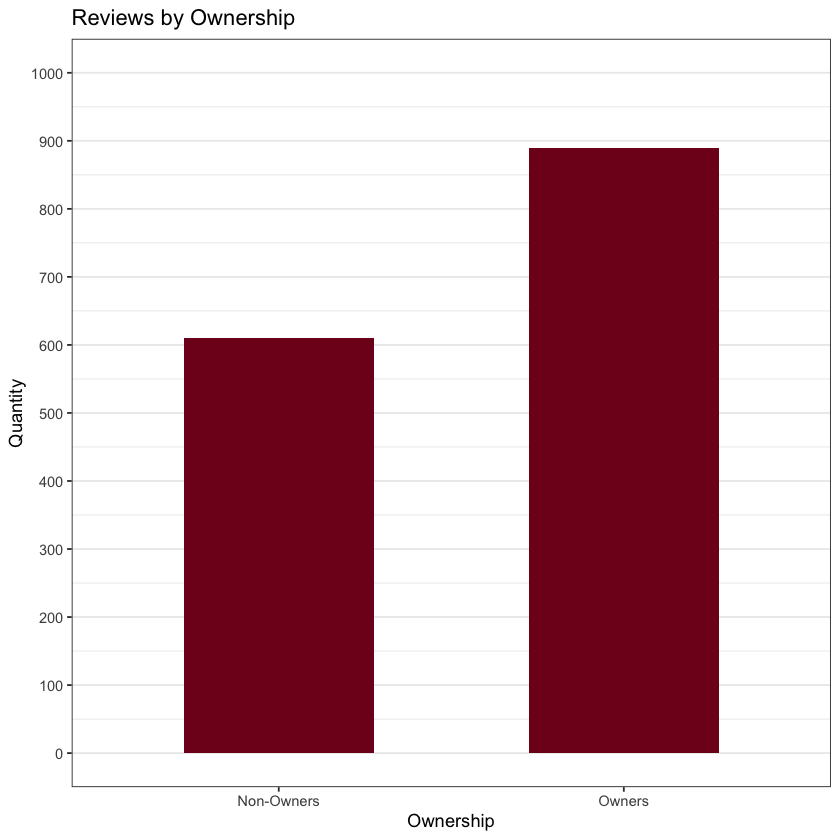

In [38]:
# Adding labels
df <- df%>%
mutate(owned_labs = factor(owned, labels = c("Non-Owners", "Owners")))


# The most numbers of observations across categories
df%>%
select(owned_labs)%>%
count(owned_labs)%>%
rename('Quantity' ='n', 'Ownership' = 'owned_labs')%>%
arrange(desc(Quantity))

# There is significantly much more "Owners" than "Non-Owners"
df%>%
ggplot(aes(owned_labs))+
geom_bar(fill = "#800020", width = .55)+
labs(title = "Reviews by Ownership",
	 x = "Ownership",
	 y = "Quantity")+
scale_y_continuous(limits = c(0, 1000), breaks = seq(0, 1000, by = 100))+
theme_bw()+
theme(panel.grid.major.x = element_blank())

**There is much more reviewers which are "Owners" than "Non-Owners".**

In [39]:
# Top 3 reviewers which are "Owners" or "Non-Owners"
df%>%
select(make_model, owned_labs)%>%
count(make_model, owned_labs)%>%
rename('quantity' ='n')%>%
top_n(3)%>%
arrange(desc(quantity))

Selecting by quantity


make_model,owned_labs,quantity
<fct>,<fct>,<int>
Nielah-Eyden,Owners,486
Lunna-Eyden,Non-Owners,196
Nielah-Eyden,Non-Owners,166


### Distribution of "overall_rating" with Histogram

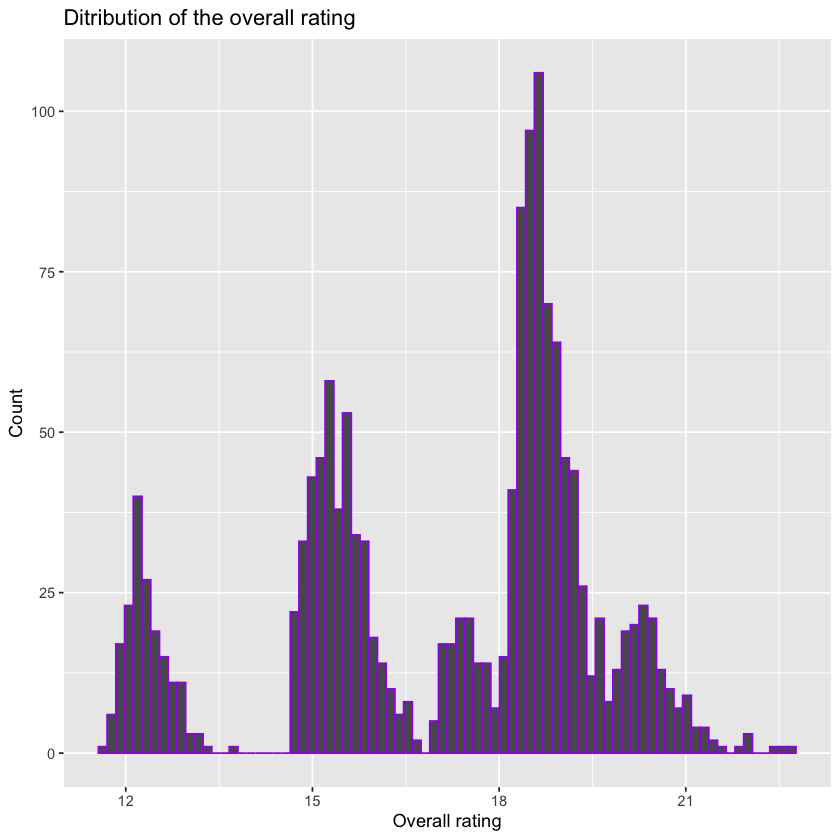

In [40]:
df%>%
ggplot(aes(overall_rating))+
geom_histogram(bins = 80, colour = "purple")+
labs(title = "Ditribution of the overall rating",
	x = "Overall rating",
	y = "Count")

This is the trimodal histogram. Dividing this histogram into 3 major peak, we can conclude that:

> First interval of peak is approx. **[12-13]**

> Second interval of peak is approx. **[15-16]**

> Third interval of peak is  approx. **[19-20]**

Furthermore, there is a large amounts of numbers in this interval **[18-20]**

### Distribution of "overall_rating" with Boxplot

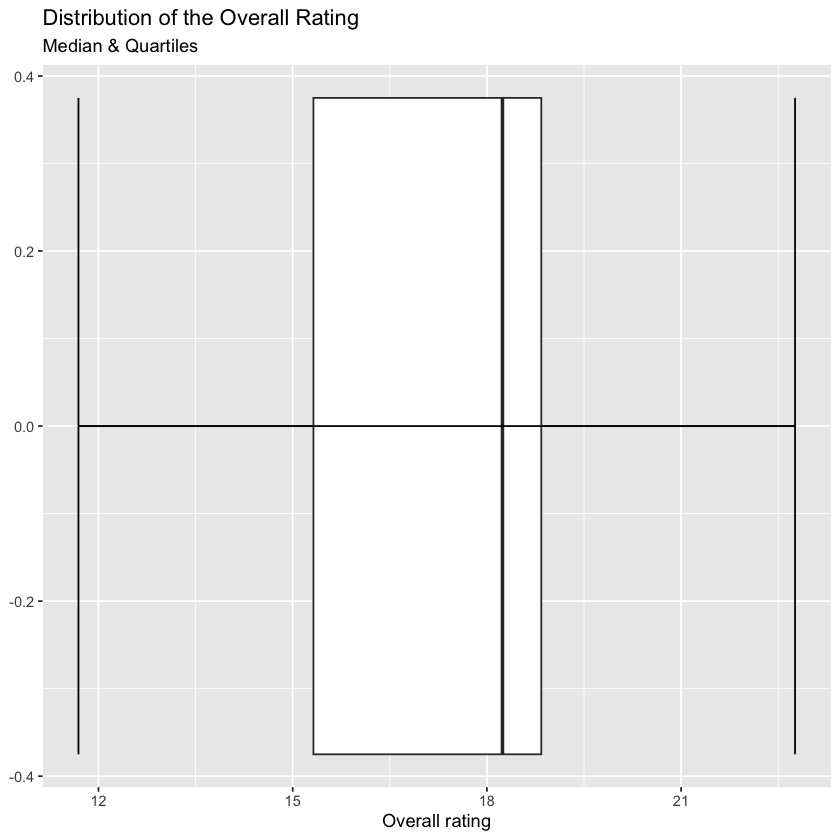

In [43]:
df%>%
ggplot(aes(overall_rating))+
geom_boxplot()+
stat_boxplot(geom = "errorbar")+
labs(title = "Distribution of the Overall Rating",
	subtitle = "Median & Quartiles",
	x = "Overall rating")

### **The boxplot describes distribution the age of reviewers:**

> **The "50%" of data is located in [15 - 19] interval.**

> **First quartile shows that 25% less data is approx. 15 and 75% are above that.**

> **The median (Second quartile) is 18.5.**

> **Third quartile shows that 75% less data is approx. 19 and 25% are above that.**

### Difference across Overall Rating between `models.`

In [ ]:
df%>%
ggplot(aes(overall_rating, make_model, fill = owned_labs))+
geom_boxplot()+
labs(title = "Difference across overall rating between models",
	x = "Overall rating",
	y = "Models")

**There is a Boxplots across each category of model dividing by "Owners" and "Non-Owners".**

> According to the **"Hoang-Eyden"** model, the **"Owners"** category tends to have higher ratings in the approximate interval of [20 - 21]. Additionally, there is a significant difference observed across categories, indicating that **"Owners"** tend to leave much higher overall ratings compared to other categories.

> **"Hoang-Keetra"** is much more euqally in Ownership for leaving rating, which occurs in approx. **[17 - 18]**.

> The distributions of ratings for the **"Nielah-Keetra"** and **"Lunna-Eyden"** models occur in similar intervals. However, when it comes to the **"Owners"** category, there is a difference in ratings, but it is not significant enough to impact the tendency to leave ratings.

> The distribution of the **"Lunna-Keetra"** model represents a significant difference across categories in terms of leaving much lower Overall Rating.

The relationship between `Ownership` and `overall_rating`

In [ ]:
df%>%
ggplot(aes(overall_rating,fill = owned_labs))+
geom_bar() +
labs(title = "Relationship beetween Ownership and Overall rating", x = "Overall rating", y = "Counts") +
facet_wrap(~owned_labs)


**Bar charts displays the relationship beetween Ownership and Overall Rating.**

The relationship between ownership (whether **"Owners"** or **"Non-Owners"**) and the number of overall ratings is consistent across separate panels for each level of ownership. Therefore, we can conclude that there is a significant association between ownership and the number of overall ratings.

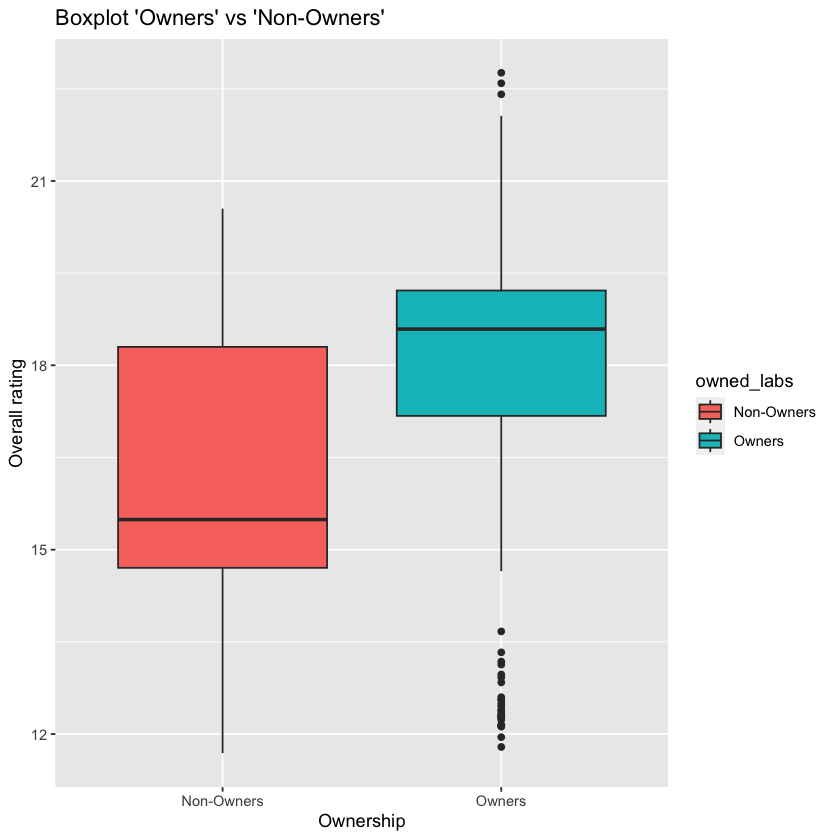

In [44]:
df%>%
ggplot(aes(owned_labs, overall_rating, fill = owned_labs))+
geom_boxplot()+
labs(title = "Boxplot 'Owners' vs 'Non-Owners'",
	x = "Ownership",
	y = "Overall rating")

**"Owners" have much more tendency to leave higher Overall Rating than "Non-Owners"**

## Machine learning models

According to our goal, we need to find out whether a review came from an owner or not. 

The business wants to predict whether a review came from an **"Owners"** on **"Non-Owners"**, which is a binary outcome (whether **"Owners"** or **"Non-Owners"**). So, this is a classification problem as well.


In [45]:
df <- df%>%
select(-owned_labs)
df%>%head()

owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<dbl>
1,Nielah-Eyden,Oct,Chrome,23,Commuting,5,18.62
0,Nielah-Keetra,Jun,unknown,24,Commuting,4,15.55
0,Lunna-Keetra,Oct,Chrome,28,Commuting,5,12.76
1,Hoang-Keetra,Nov,IE,41,Leisure,5,17.07
1,Lunna-Keetra,Sep,Chrome,33,Leisure,5,12.29
0,Lunna-Eyden,Aug,IE,47,Commuting,5,15.28


In [46]:
# Split the data into training and testing sets
set.seed(123)
sample <- sample.split(df$owned, SplitRatio = 0.7)
train <- subset(df, sample == TRUE)
test <- subset(df, sample == FALSE)

# Fit a logistic regression model
model_glm <- glm(owned ~ overall_rating + make_model + reviewer_age, data = train, family = "binomial")

summary(model_glm)


Call:
glm(formula = owned ~ overall_rating + make_model + reviewer_age, 
    family = "binomial", data = train)

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -21.474767   4.003643  -5.364 8.15e-08 ***
overall_rating            1.173894   0.194535   6.034 1.60e-09 ***
make_modelHoang-Keetra    1.189838   0.766929   1.551  0.12080    
make_modelLunna-Eyden     2.996577   1.102321   2.718  0.00656 ** 
make_modelLunna-Keetra    5.070651   1.638993   3.094  0.00198 ** 
make_modelNielah-Eyden    0.344784   0.581998   0.592  0.55357    
make_modelNielah-Keetra   3.012391   1.051540   2.865  0.00417 ** 
reviewer_age              0.006434   0.007332   0.878  0.38019    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1418.8  on 1049  degrees of freedom
Residual deviance: 1144.5  on 1042  degrees of freedom
AIC: 1160.5

Number of Fisher Sco

In [47]:
# Make predictions on the testing set
pred_glm <- predict(model_glm, newdata = test, type = "response")

# Convert probabilities to binary predictions
pred_glm <- ifelse(pred_glm >= 0.5, 1, 0)

# Evaluating model accuracy
# using confusion matrix
table(test$owned, pred_glm)

accuracy <- mean(pred_glm == test$owned)
print(paste('Accuracy =', accuracy))

   pred_glm
      0   1
  0  92  91
  1  28 239

[1] "Accuracy = 0.735555555555556"


In [48]:
# # Split the data into training and testing sets
set.seed(123)
sample_rf <- sample.split(df$owned, SplitRatio = 0.7)
train_rf <- subset(df, sample_rf== TRUE)
test_rf <- subset(df, sample_rf == FALSE)

# Create the Random Forest model
model_rf <- randomForest(owned ~ overall_rating + make_model + reviewer_age, data = train_rf, ntree = 500, importance = TRUE)

summary(model_rf)



                Length Class  Mode     
call               5   -none- call     
type               1   -none- character
predicted       1050   factor numeric  
err.rate        1500   -none- numeric  
confusion          6   -none- numeric  
votes           2100   matrix numeric  
oob.times       1050   -none- numeric  
classes            2   -none- character
importance        12   -none- numeric  
importanceSD       9   -none- numeric  
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            14   -none- list     
y               1050   factor numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     